[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/peteyeh/celltrack/HEAD?labpath=param_sweep.ipynb)

In [1]:
%matplotlib inline

import cv2
import yaml

from src.improcessing import *
from src.maskcreation import *

# Read image and load base params

In [2]:
image = scale_image(cv2.imreadmulti('source_images/D1_plate1.tiff', flags=cv2.IMREAD_GRAYSCALE)[1][-1])

with open('src/params_gray_mask.yml', 'r') as f:
    param_file = yaml.load(f, Loader=yaml.FullLoader)
    mode = param_file['mode']
    base_params = param_file['params']

display(base_params)

{'invert_image': True,
 'denoise_pre': 3,
 'contrast': 100,
 'offset': -5,
 'preserve_background': False,
 'manual_threshold': 1,
 'canny_unmasking': [130, 180],
 'closure_ks': 2,
 'border_removal': 1,
 'size_thresh': 50}

# Sweep through search range

-15


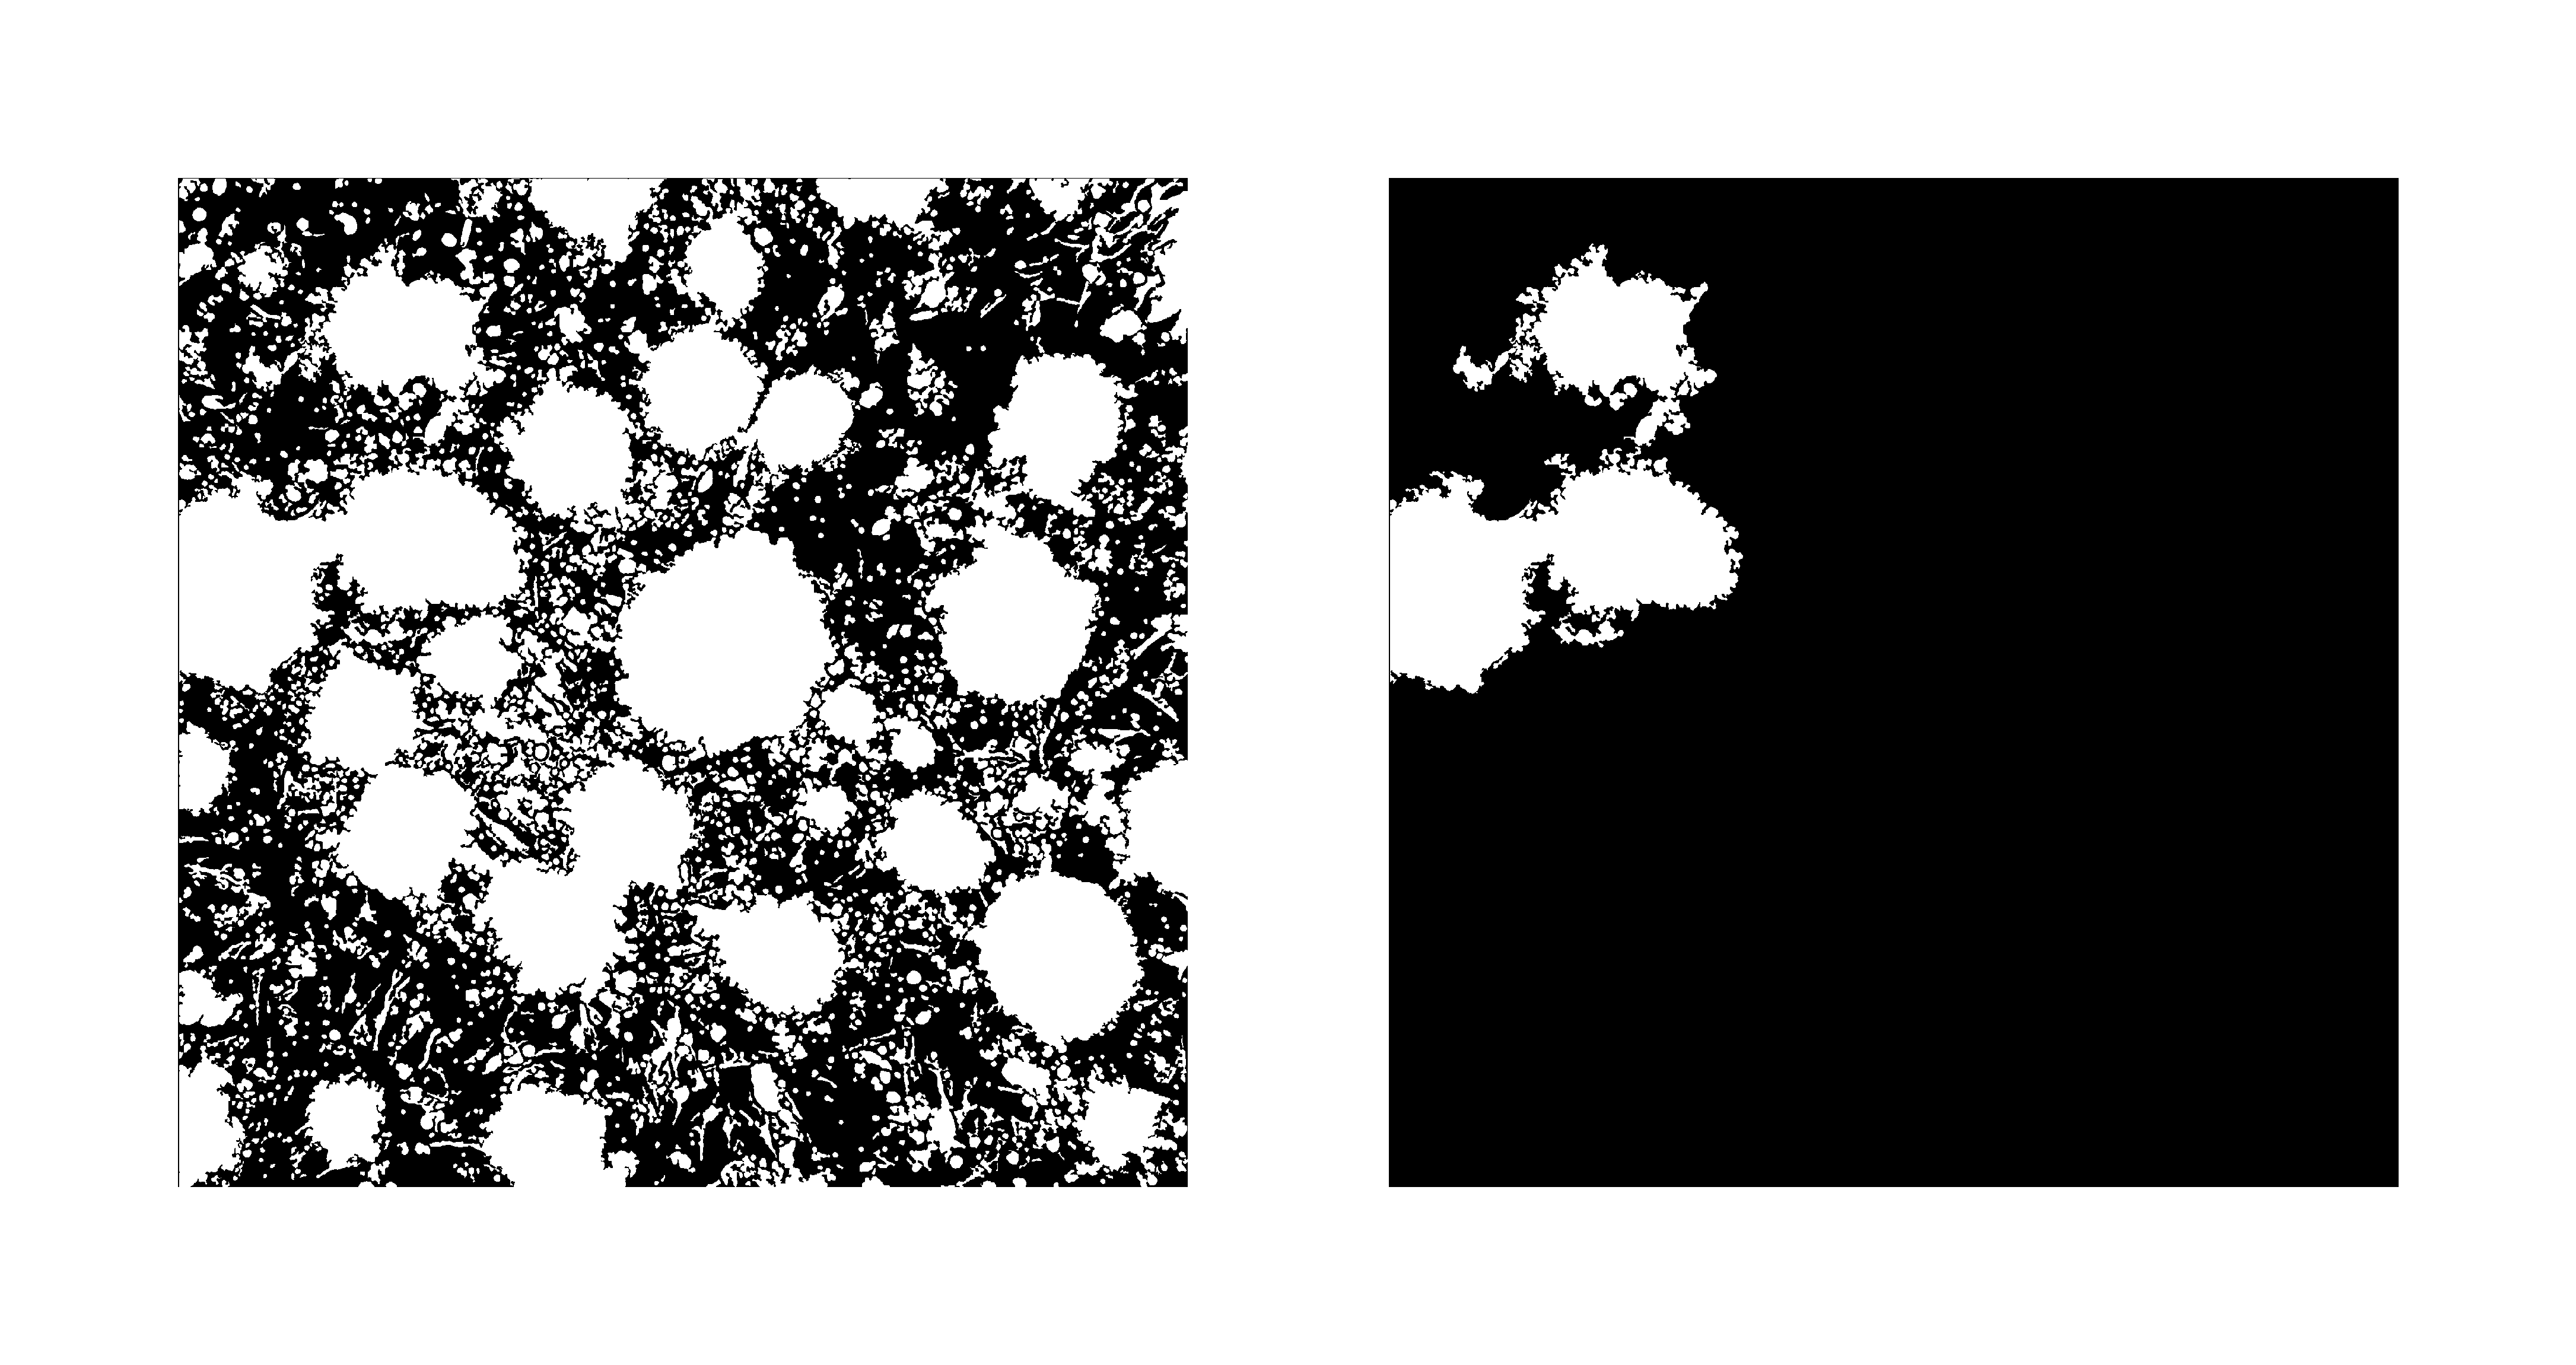

-14


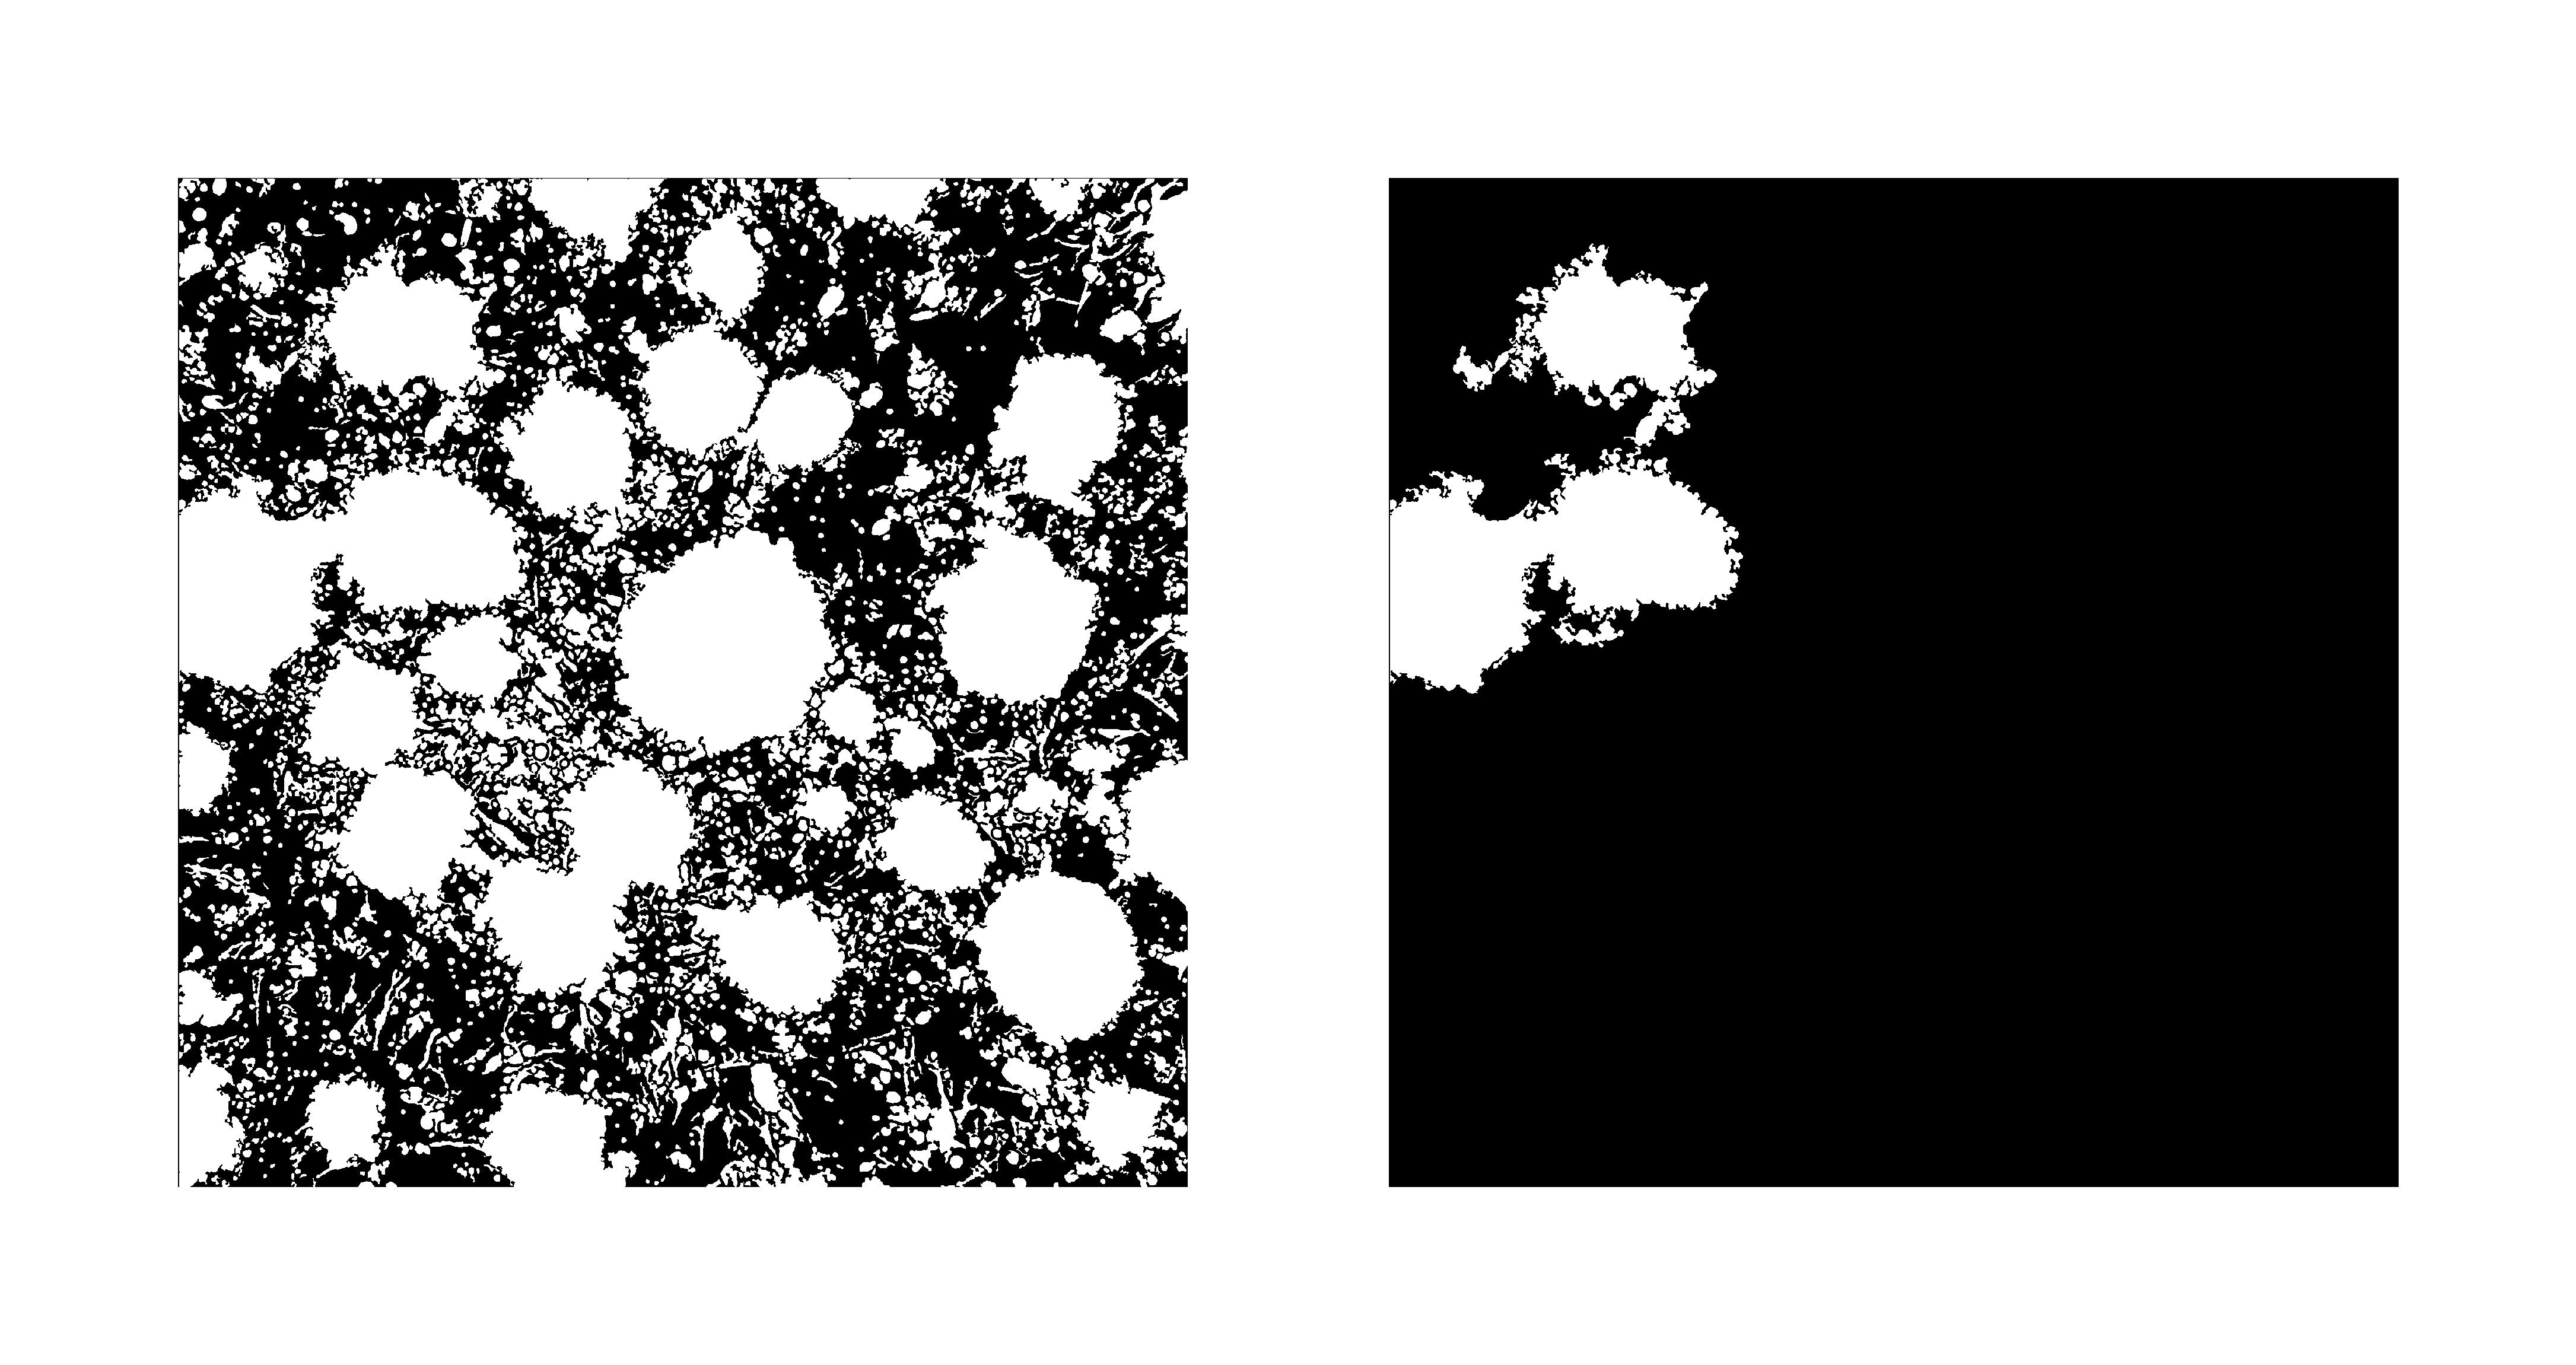

-13


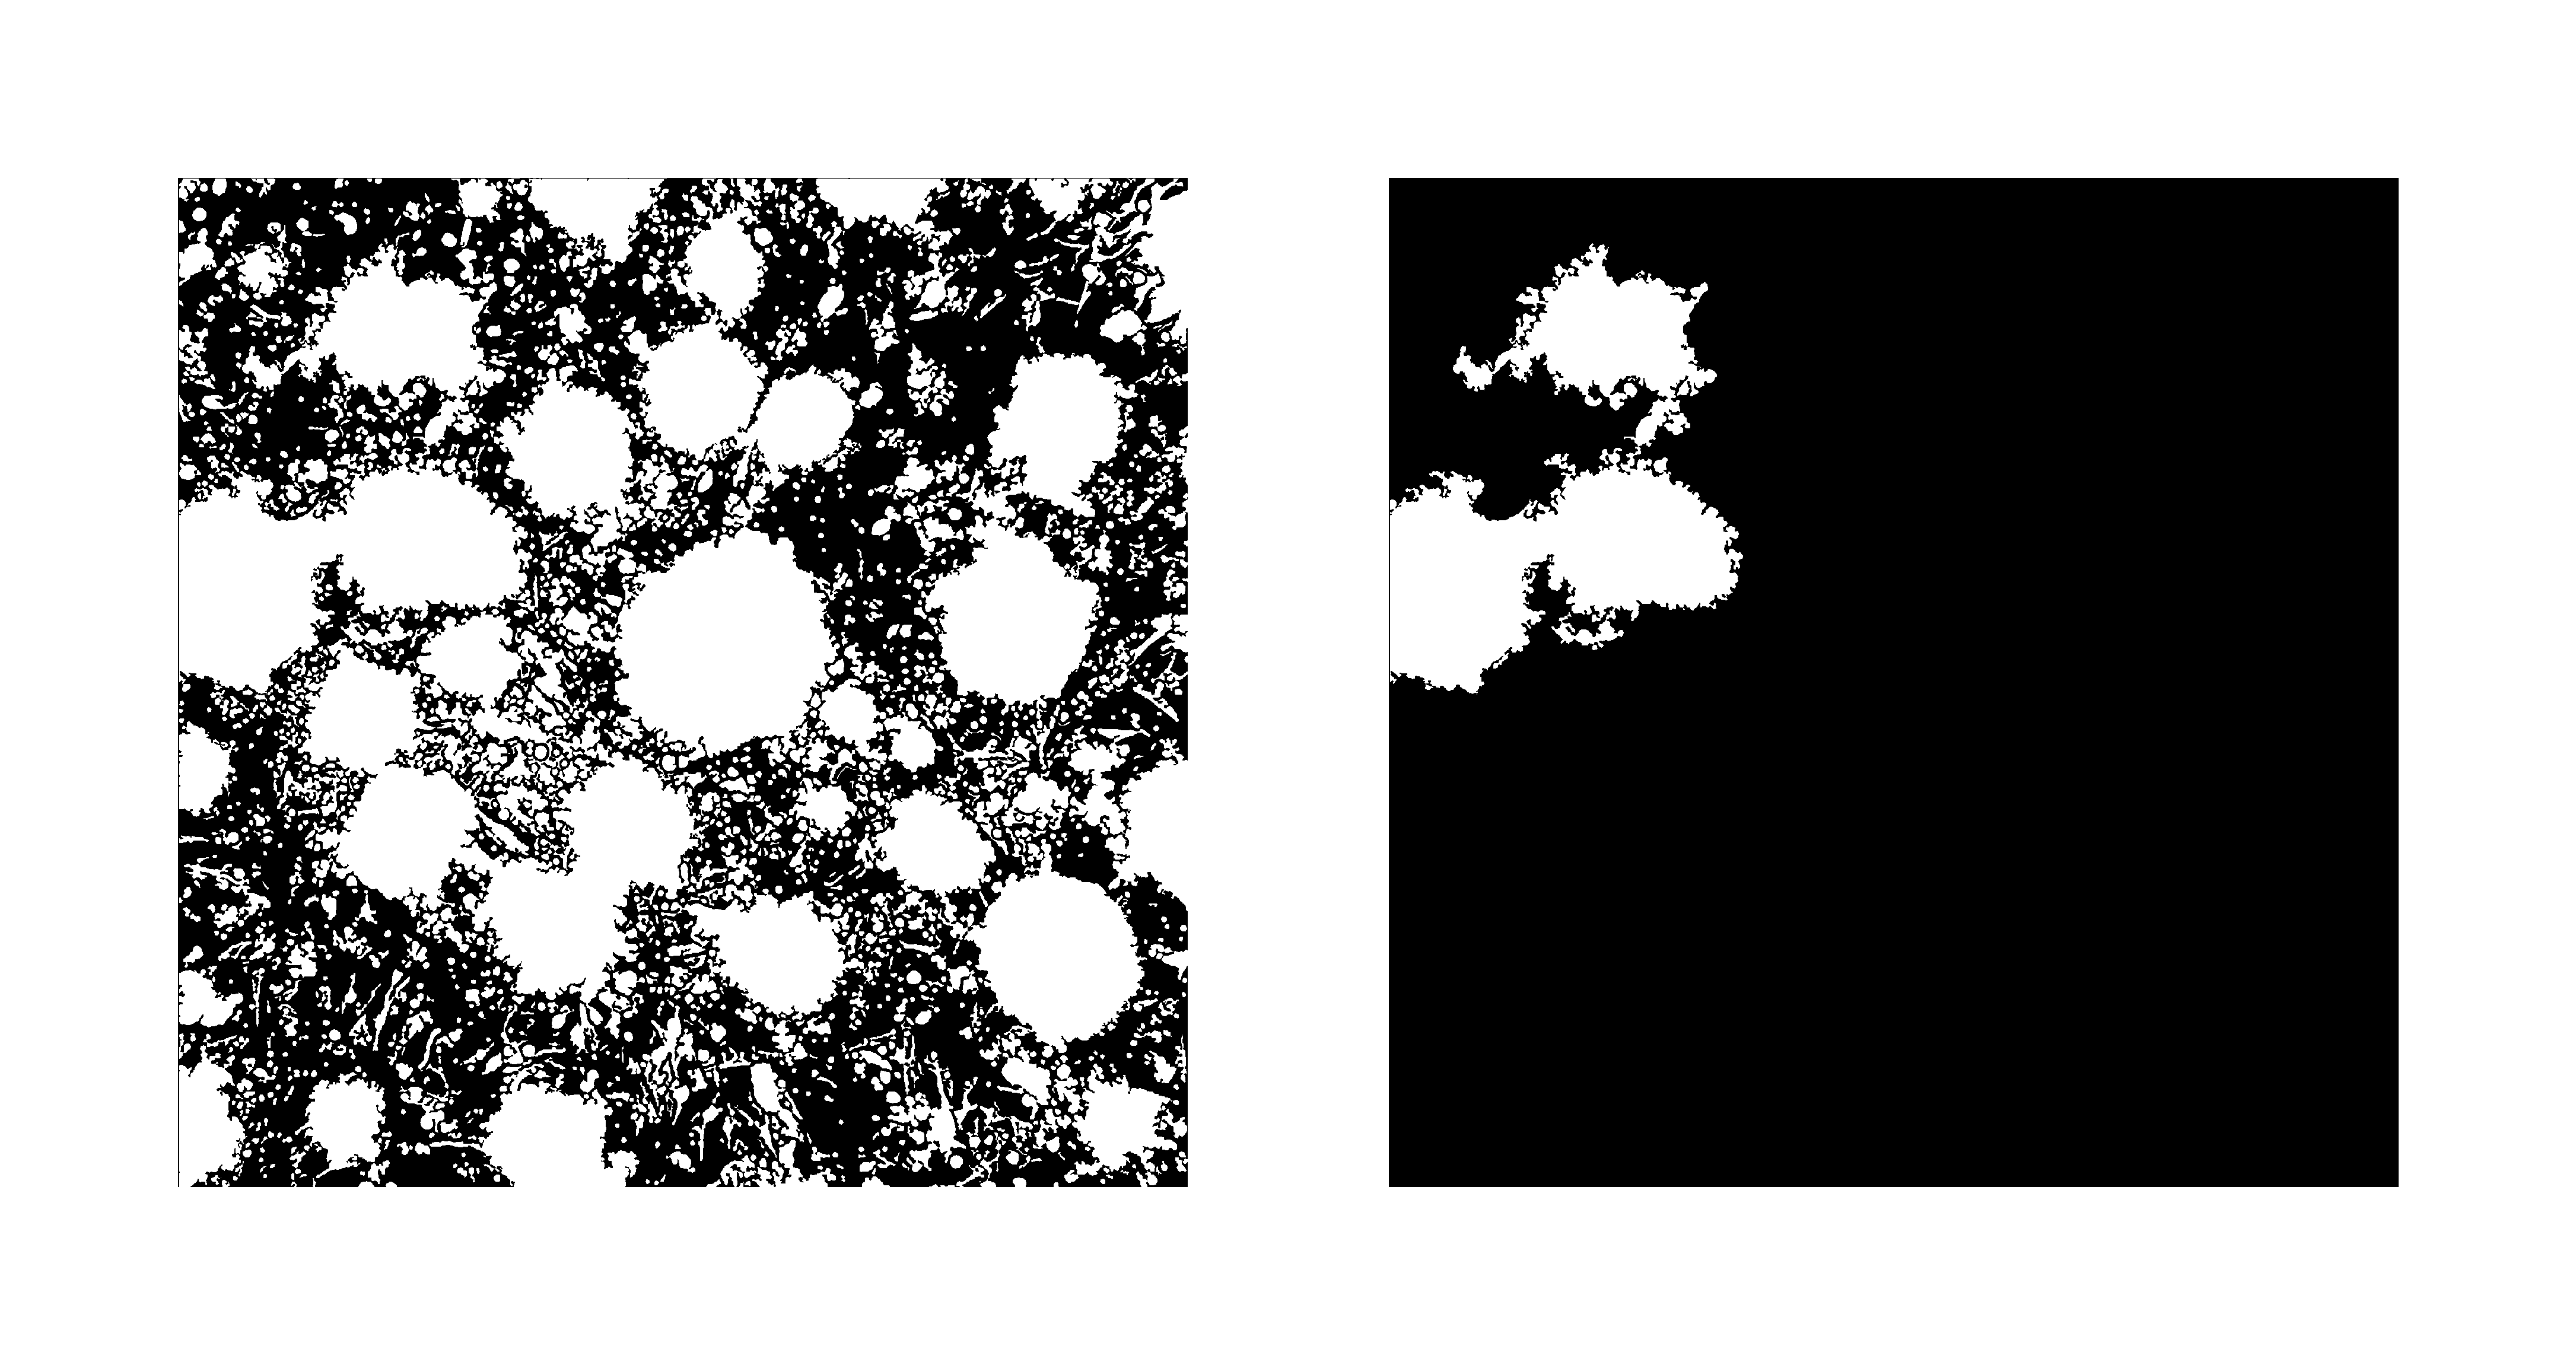

-12


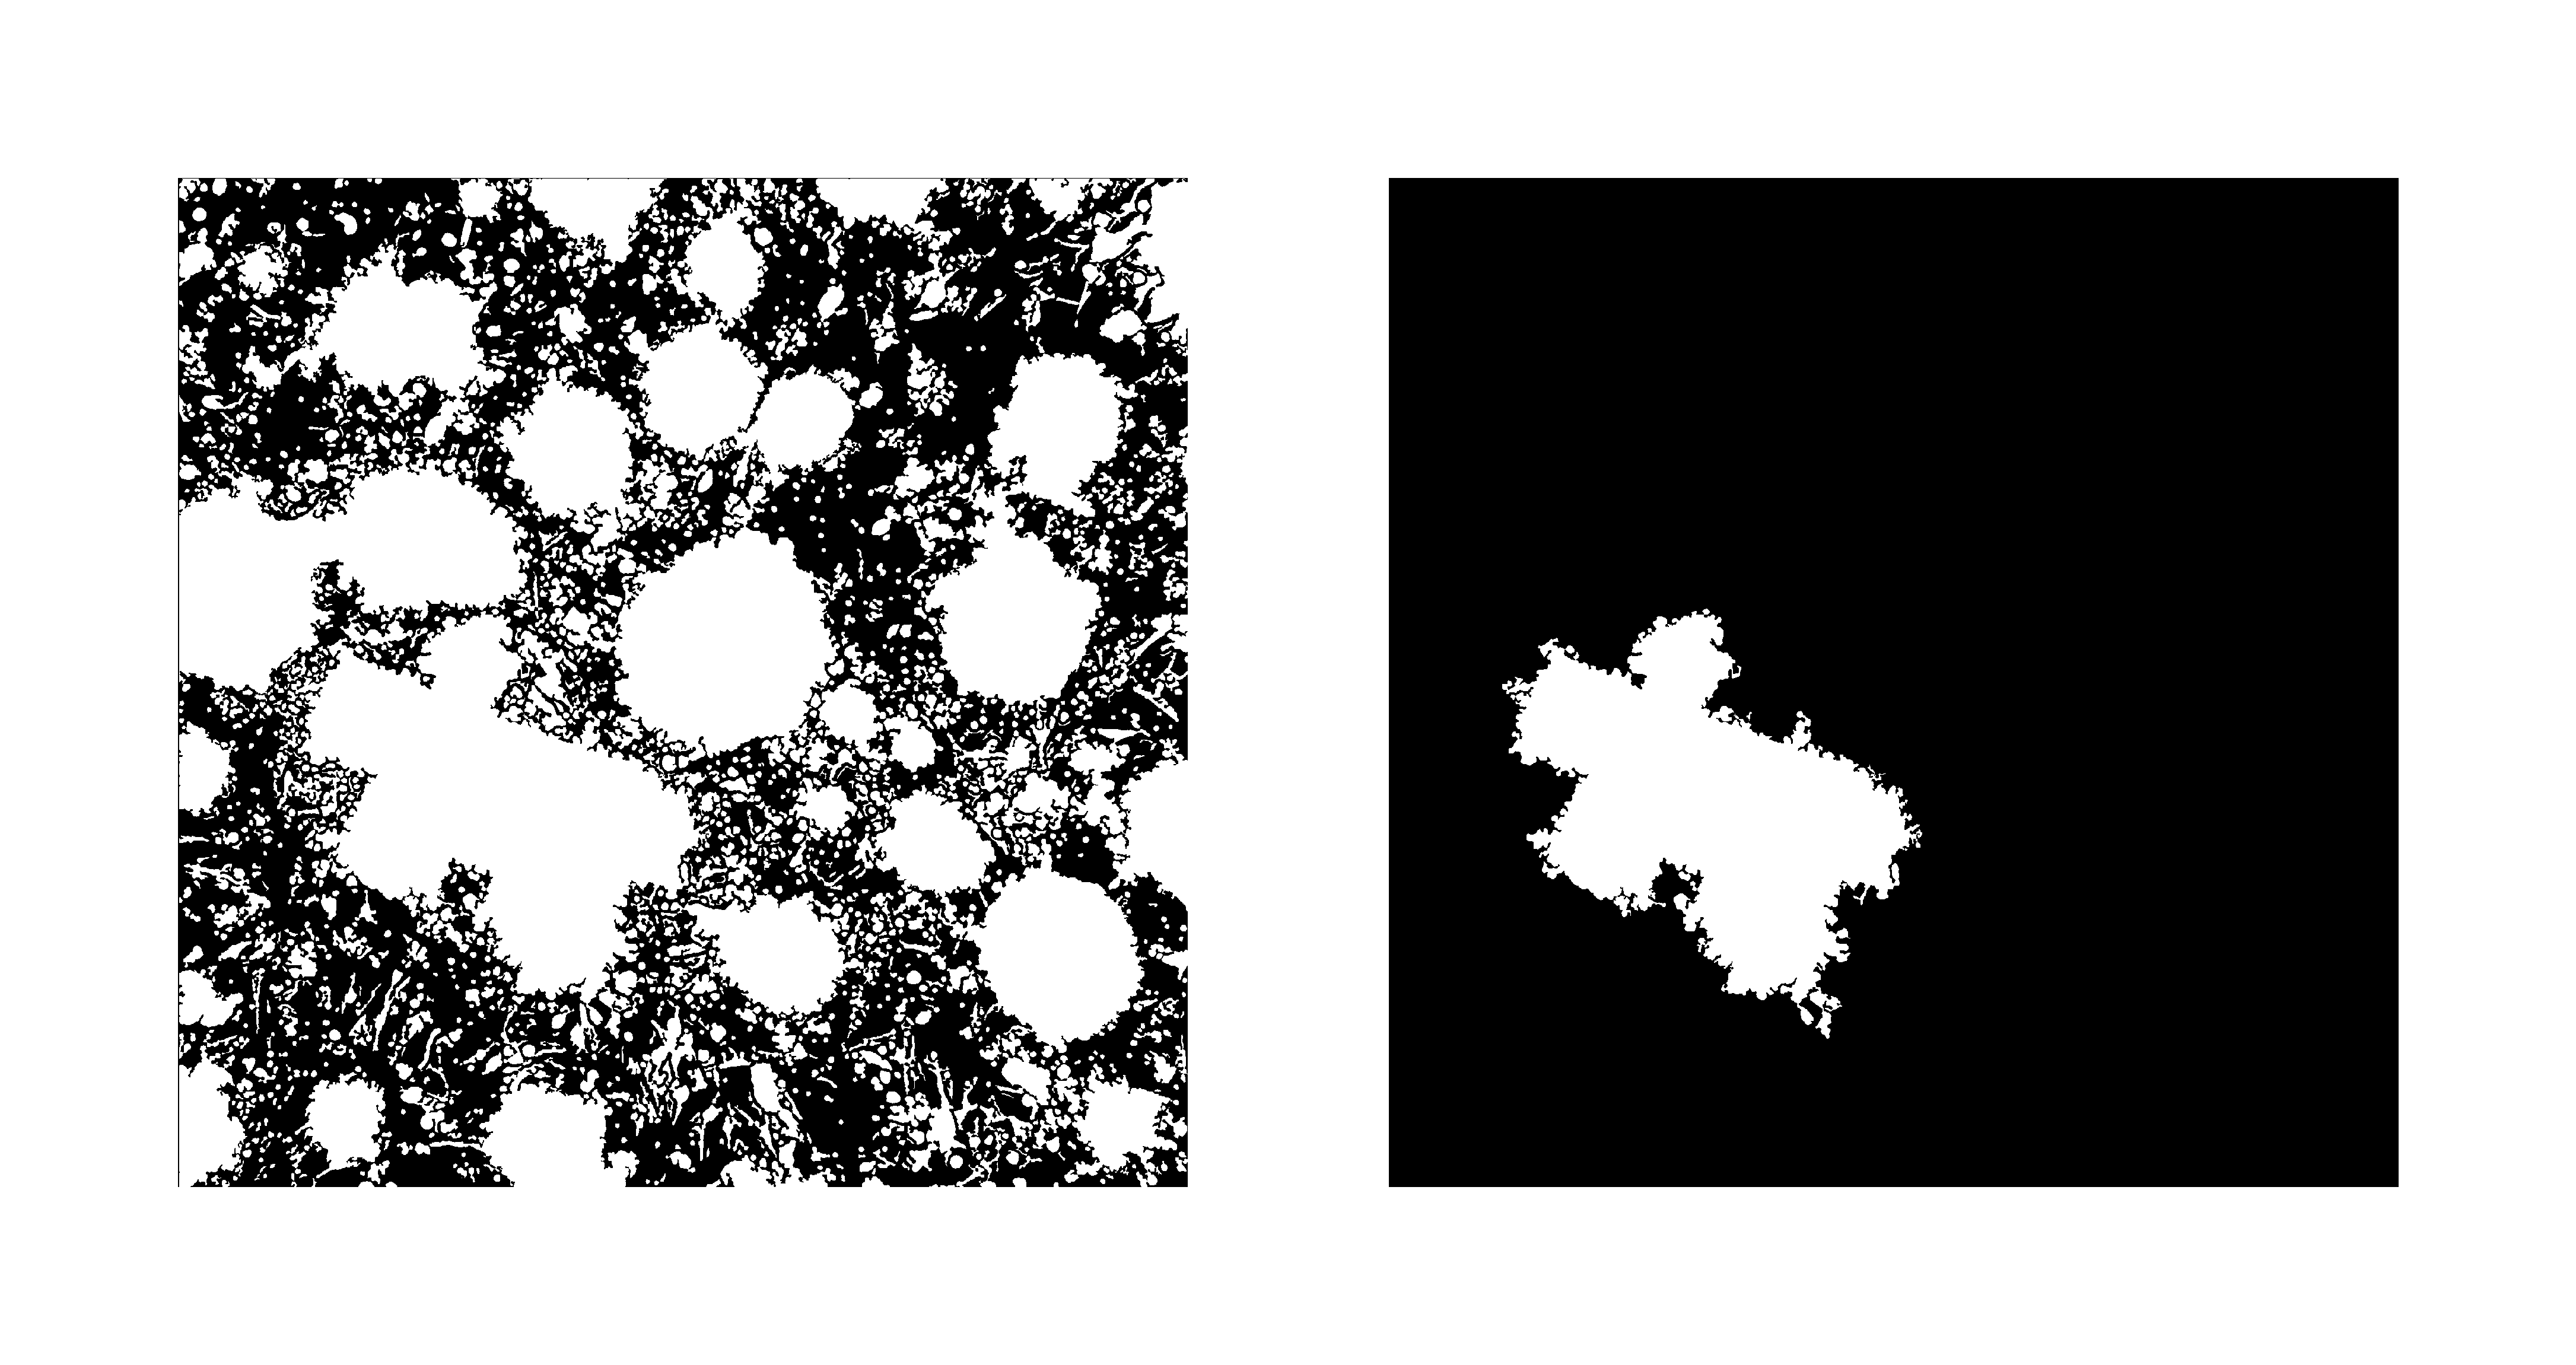

-11


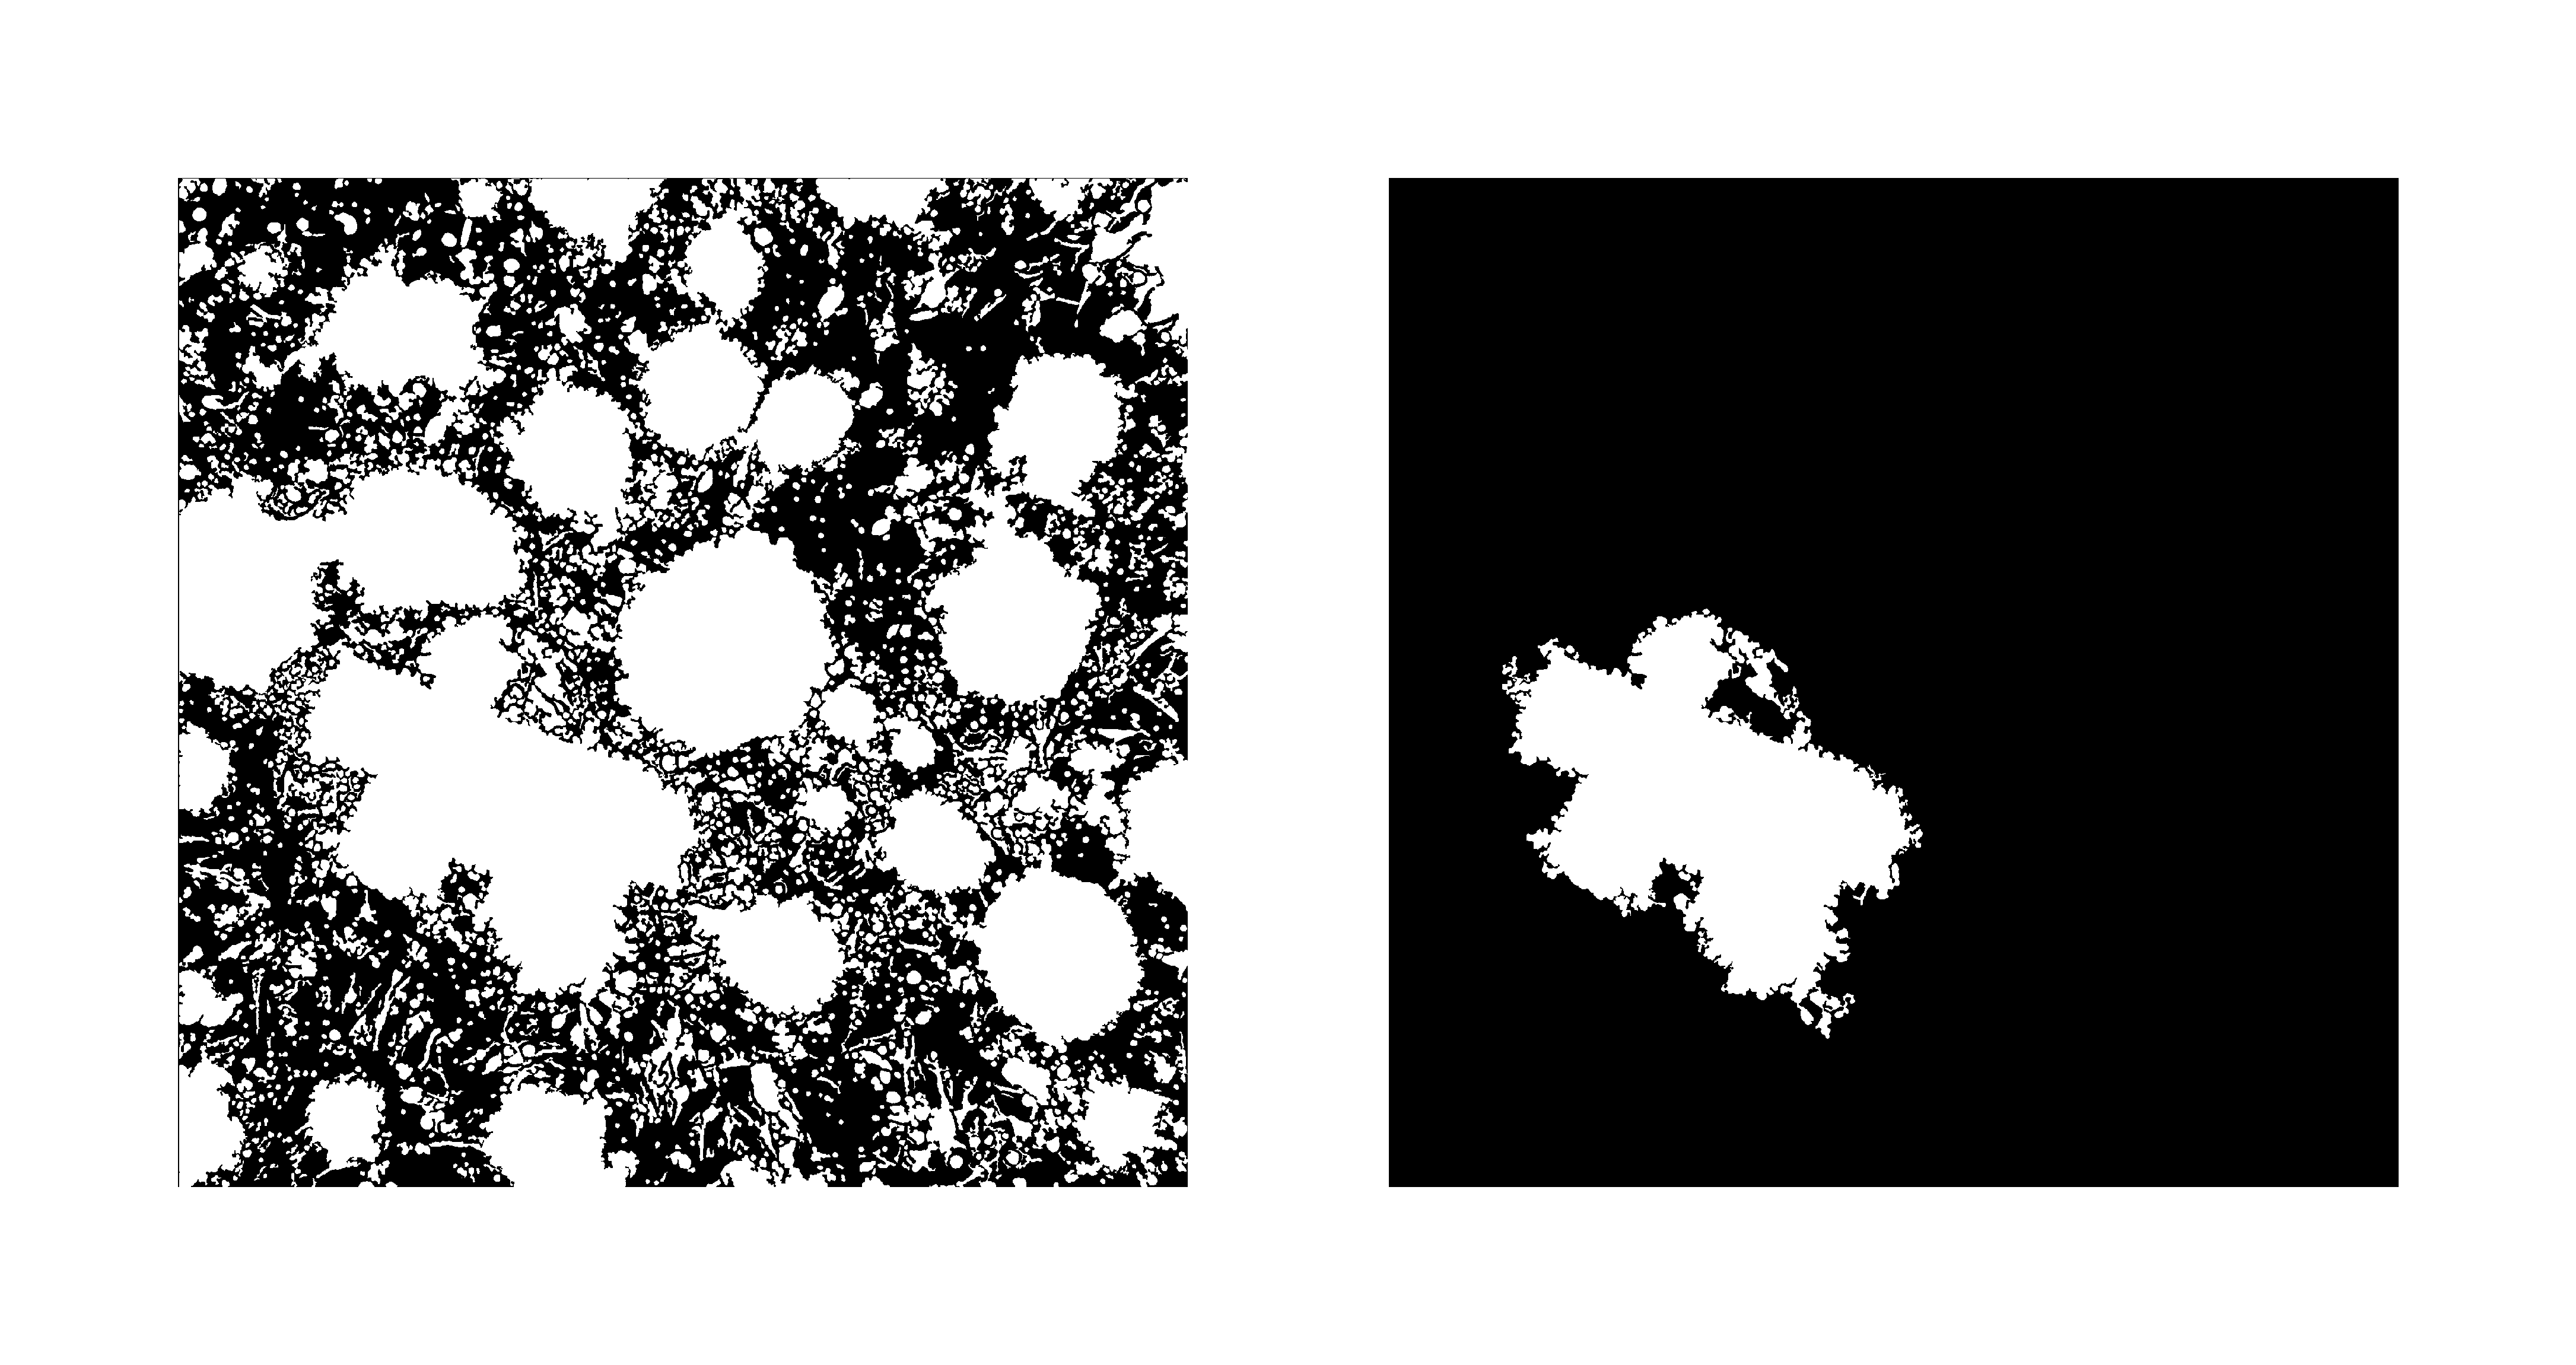

-10


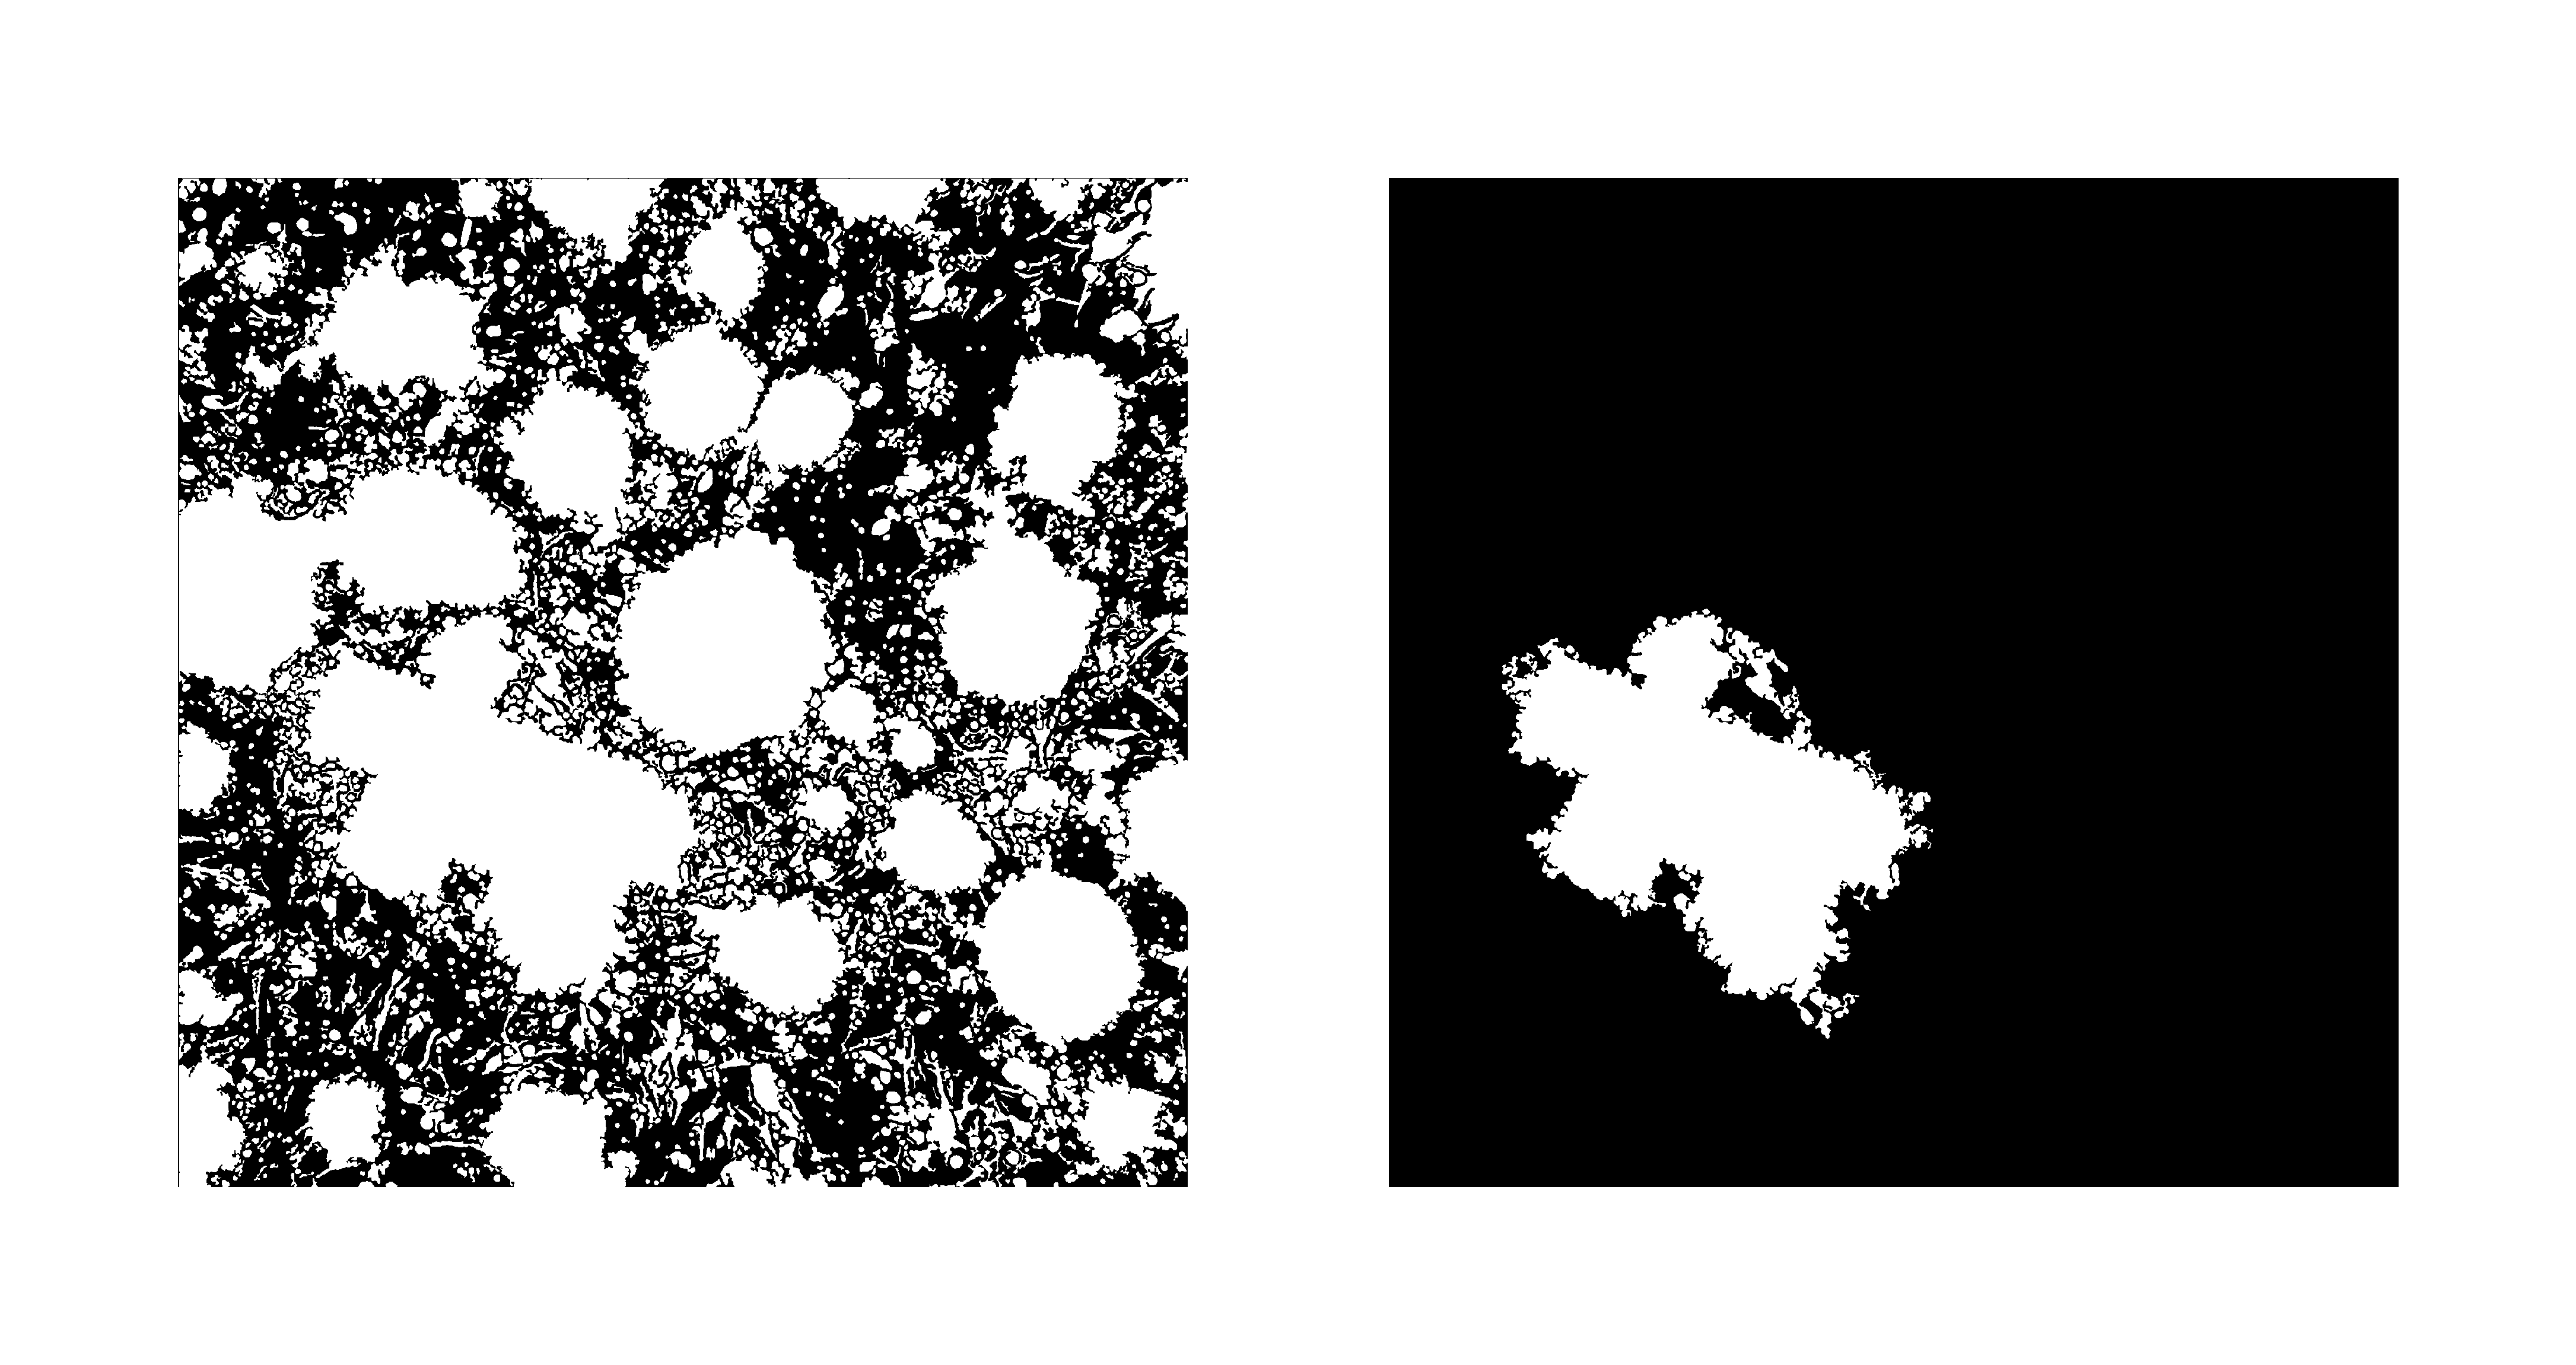

In [3]:
search_range = range(-15, -9)

num_components = []
total_area = []
largest_area = []
for offset in search_range:
    params = base_params.copy()
    params['offset'] = offset

    mask_image = get_mask_image(image, {'mode': mode, 'params': params})
    num_components += [get_num_components(mask_image),]
    total_area += [np.sum((mask_image != 0).astype(int)),]
    _, labelled, stats, _ = cv2.connectedComponentsWithStats(mask_image, connectivity=8)
    largest_area += [np.max(stats[1:,-1]),]
    largest_mask = np.uint8(labelled==np.argmax(stats[1:,-1])+1)

    print(offset)
    display_image_array([mask_image, largest_mask], dpi=3000)

# Plot trends

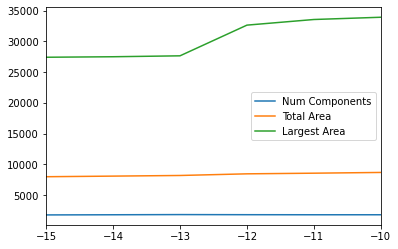

In [4]:
plt.plot(search_range, num_components, label="Num Components")
# 250 is arbitrary factor just to put everything on a similar scale
plt.plot(search_range, np.array(total_area)/250, label="Total Area")
plt.plot(search_range, np.array(largest_area)/10, label="Largest Area")
plt.xlim([search_range[0], search_range[-1]])
plt.legend()
plt.show()

# Select final param using derivatives

In [5]:
print("Search range      : %s" % np.array(search_range))
print("Largest area diffs: %s" % np.diff(largest_area))
print("Total area diffs  : %s" % np.diff(total_area))

Search range      : [-15 -14 -13 -12 -11 -10]
Largest area diffs: [  818  1497 49912  9150  3667]
Total area diffs  : [24559 25929 66985 26278 30174]


In [6]:
print("Selected offset: %s" % refine_offset(image)['params']['offset'])

Selected offset: -13
